# BIOMAG introduction material 2. - Pytorch basics - Tensors

A tensor is a basic datatype in pytorch (and all other deep learning frameworks as well). They are basically n-dimensional matrices which can be really beneficial when using them on the GPU. In this lesson, you will see how you can convert between tensors and numpy arrays, how you can manipulate tensors and why using the GPU for tensors is highly important.

In [26]:
# torch - an open source machine learning library (primarily used for deep learning)
import torch
# numpy - for numerical computing and array manipulation
import numpy as np
# time - for time measurement
import time
# matplotlib - for plotting
import matplotlib.pyplot as plt

The first thing you should check when using the torch library is whether you have access to the GPU or not.

In [3]:
torch.cuda.is_available()

True

If this function returns `False`, try to install torch from [here](https://pytorch.org/get-started/previous-versions/). You can select the preferred pytorch and the corresponding cuda version.

First, let us see the most well known array-like structures:

In [5]:
# list
data = [[1,2],[3,4]]
print(type(data))
print(data)

# numpy array
np_data = np.array(data)
print(type(np_data))
print(np_data)

# torch tensor
tensor_data = torch.tensor(data)
print(type(tensor_data))
print(tensor_data)

<class 'list'>
[[1, 2], [3, 4]]
<class 'numpy.ndarray'>
[[1 2]
 [3 4]]
<class 'torch.Tensor'>
tensor([[1, 2],
        [3, 4]])


By default, all of the tensor data operations are carried out on the CPU, but we can move our data to the GPU:

In [8]:
print('Device before moving to gpu:', tensor_data.device)
torch_data = tensor_data.to('cuda')
print('Device after moving to gpu: ', torch_data.device)

Device before moving to gpu: cpu
Device after moving to gpu:  cuda:0


Now let us see some basic tensor operations:

In [9]:
tensor_1 = torch.tensor([[1,2,1],
                        [0,1,1],
                        [0,4,1]])
tensor_2 = torch.tensor([[1,0,1],
                        [0,1,1],
                        [0,0,1]])

In [ ]:
print(tensor_1 + tensor_2) # addition
print(tensor_1 - tensor_2) # subtraction
print(tensor_1 * tensor_2) # multiplication
print(tensor_1 @ tensor_2) # what's the difference compared to the previous one?
print(tensor_1.sum())

tensor([[2, 2, 2],
        [0, 2, 2],
        [0, 4, 2]])
tensor([[0, 2, 0],
        [0, 0, 0],
        [0, 4, 0]])
tensor([[1, 0, 1],
        [0, 1, 1],
        [0, 0, 1]])
tensor([[1, 2, 4],
        [0, 1, 2],
        [0, 4, 5]])
tensor(11)


In [14]:
print(tensor_1.view(9))
print(tensor_1.view(3,3))

tensor([1, 2, 1, 0, 1, 1, 0, 4, 1])
tensor([[1, 2, 1],
        [0, 1, 1],
        [0, 4, 1]])


But when are tensors useful the most? Why do we need them instead of using numpy arrays?

In [15]:
tensor_1 = torch.rand((4,3,2048,2048))
tensor_1 = tensor_1.view(4,3,2048*2048)

In [16]:
tensor_2 = torch.rand((2048*2048,64))

In [17]:
t = time.time()
tensor_1@tensor_2
elapsed = time.time() - t
print(elapsed)

0.11632466316223145


Move tensors to the GPU

In [19]:
tensor_1 = tensor_1.to('cuda')
tensor_2 = tensor_2.to('cuda')


In [20]:
t = time.time()
tensor_1@tensor_2
elapsed = time.time() - t
print(elapsed)

0.04961395263671875


`torch` also gives us access to the `requires_grad` field for tensors. Let us see how we can use in a simple setting (in terms of a quadratic function):

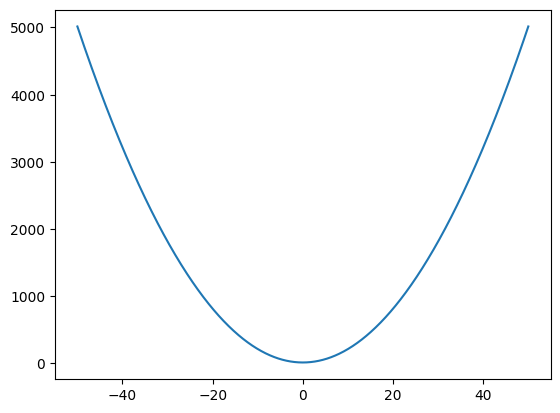

In [99]:
x = torch.linspace(-50,50,1000, dtype=torch.float32, requires_grad=True) # 1000 points from -50 to 50, with gradient calculation
m = torch.tensor([2.0], requires_grad=True) # slope
b = torch.tensor([15.0], requires_grad=True) # intercept
y = m * x**2 + b # y = mx^2 + b
plt.plot(x.detach().numpy(), y.detach().numpy()) # plot the function - detach() is used to remove the object from the current graph. The result will never require gradient.
plt.show()

In [100]:
v = torch.ones_like(y) # vector of ones with the same shape as y - needed for the backward function
y.backward(gradient=v) # calculate the gradient of y

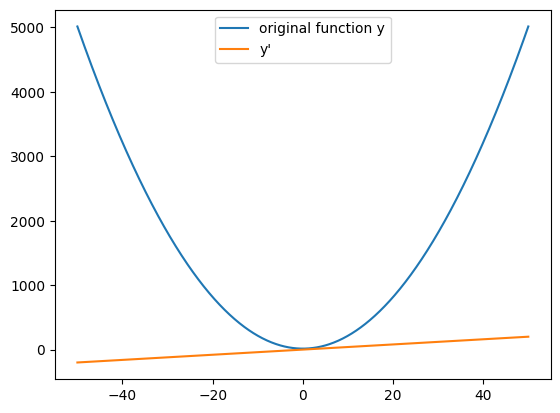

In [101]:
plt.plot(x.detach().numpy(), y.detach().numpy(), label="original function y") # plot the function - detach() is used to remove the object from the current graph. The result will never require gradient.
plt.plot(x.detach().numpy(), x.grad.numpy(), label="y'")
plt.legend()
plt.show()

### Homework

1. Try to visualize the difference between using a GPU or a CPU for tensor operations using matplotlib, with ever incresing tensor sizes.
2. Write a function that takes a 2D vector as input and performs a 2D transformation (a combination of rotation, translation, scaling) on the vector using only matrix multiplication, using only pytorch datatypes and pytorch math operations. (Look for homogeneous coordinates)